In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Elliptic curves mod $p$

We start with a quick introduction to elliptic curves mod $p$.

* An elliptic curve is a set of solutions $(x,y)$ to an equation of the form $y^2 = x^3 + fx + g$, where $f, g$ are constants and the cubic $x^3 + fx + g$ does not have a repeated root (equivalently, $4f^3 + 27g^2 \neq 0$), together with an extra point "at infinity".

* "mod $p$" means we are choosing a prime $p$, and we are looking at pairs $(x,y)$ where $x,y$ are integers and looking for pairs where $(y^2 \pmod p) = (x^3 + fx +g \pmod p)$.

### Example

Our go to example will be the curve $y^2 = x^3 + 3x \pmod 5$.

We can write a 1-line function that obtains all solutions to this within a given range:

In [2]:
def points_on_curve(f:int,g:int,p:int,xmin,xmax,ymin,ymax):
    return np.array([np.array([x,y]) for x in range(xmin,xmax)
            for y in range(ymin,ymax)
            if (y*y)%p==(x**3+f*x+g)%p])

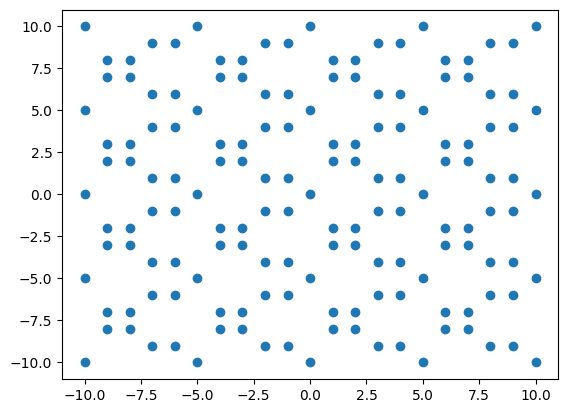

In [3]:
pts_ex = points_on_curve(3,0,5,-10,11,-10,11)
plt.scatter(x=pts_ex[::,0],y=pts_ex[::,1])

Note that the picture repeats in both directions - i.e. it is "doubly periodic" - so we don't need to look at the whole picture. All of the information in the picture can be seen by looking at a $p \times p$ square - any such square will do.

In [ ]:
## Make pictures with fundamental domains
pts_ex = points_on_curve(3,0,5,-10,11,-10,11)
plt.scatter(x=pts_ex[::,0],y=pts_ex[::,1])


## Problems with baseline visualization

The baseline picture is based on an ad hoc definition of "elliptic curve". The actual definition of an elliptic curve is "a genus one curve with a marked point".
* "Genus one" means the points should live on something that looks like a torus (i.e. the surface of a donut). Our picture does not look anything like a donut.
* The "marked point" for an elliptic curve of this form is the point at infinity - we can't actually see it in the picture. 

Ok, so while our definition is easy to understand, it leads to a picture that looks nothing like the thing our object is meant to look like.

### Group Law
The points on an elliptic curve form a "group". This means there is a rule that lets us "add points" on the curve. This follows from the fact that elliptic curves are tori - but in addition to not seeing the torus structure, there is also no clue from the picture that there should be something like a group structure.

### Geometry mod $p$

Whenever we draw a picture in $\mathbb{R}^2$, we are implicitly assigning a notion of distance to the points we are drawing. Usually, this isn't worth mentioning because we are working with things assumed to live in Euclidean space. 

However, the "distance" between two points in picture depends on our choice of fundamental domain - since it changes from picture to picture, it is a meaningless detail, but as long as we use this type of picture, it will have an undue influence in how we read the picture. 

Our goal is to obtain pictures that address these issues.